## Observations and Insights

# Conclusions
# 1) The two drugs that seem to have the largest positive impact on tumor volume are Ramicane and Capomulin. It would be interesting to combine gender data into this analysis to see if a specific drug was better for a specific gender.
# 2) Of the four top drugs analyzed, there was only one data point that was an outlier. This was for the drug Infubinol and the outlier was below the lower bound value. It is interesting to note this data point is in line with the average values for the two most successful drugs.
# 3) Tumor size is closely correlated with weight. The correlation coefficient of 0.84 indicates that the more a mouse weighs, the larger their tumor is.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_merge.head()

# Conclusions
# 1) The two drugs that seem to have the largest positive impact on tumor volume are Ramicane and Capomulin. It would be interesting to combine gender data into this analysis to see if a specific drug was better for a specific gender.
# 2) Of the four top drugs analyzed, there was only one data point that was an outlier. This was for the drug Infubinol and the outlier was below the lower bound value. It is interesting to note this data point is in line with the average values for the two most successful drugs.
# 3) Tumor size is closely correlated with weight. The correlation coefficient of 0.84 indicates that the more a mouse weighs, the larger their tumor is.



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_df = mouse_merge[["Drug Regimen","Tumor Volume (mm3)"]]
mm_names = mouse_merge["Drug Regimen"].unique()
#create different data frames for each of the statistics needed for the summary table
tv_df_gb = mouse_merge.groupby("Drug Regimen").count()
tv_df_mean = tv_df.groupby("Drug Regimen").mean()
tv_df_median = tv_df.groupby("Drug Regimen").median()
tv_df_var = tv_df.groupby("Drug Regimen").var()
tv_df_std = tv_df.groupby("Drug Regimen").std()
tv_df_sem = tv_df.groupby("Drug Regimen").sem()
# merge together the data frames created above
merge_tv = pd.merge(tv_df_mean,tv_df_median, on="Drug Regimen",suffixes=('_mean','_median'))
merge_tv = pd.merge(merge_tv,tv_df_var, on="Drug Regimen").rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_var'})
merge_tv = pd.merge(merge_tv,tv_df_std, on="Drug Regimen").rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_std'})
merge_tv = pd.merge(merge_tv,tv_df_sem, on="Drug Regimen").rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_sem'})
# print the final data frame
merge_tv


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


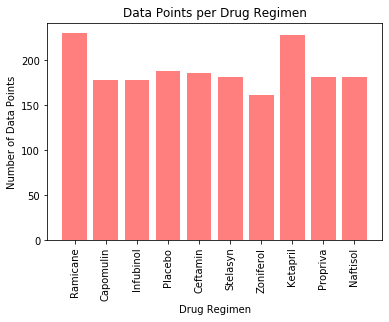

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# create the axis to plot using pyplot
x_axis = np.arange(0,len(tv_df_gb),1)
y_axis = tv_df_gb["Mouse ID"]
# plot the chart and change the colors
plt.bar(x_axis,y_axis,color='r',alpha=0.5, align="center")
# Create tick locations and format the chart to look better
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,mm_names, rotation = 90)
plt.title('Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Bar plots

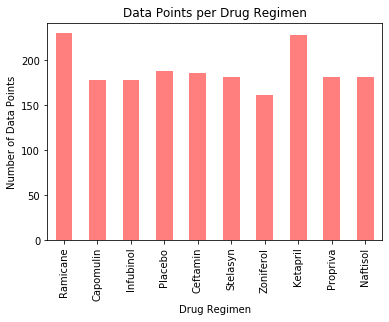

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create tick locations and format the chart to look better
tv_df_gb["Mouse ID"].plot.bar(color='r',alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,mm_names, rotation = 90)
plt.title('Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# create a data frame for gender to be ploted in a pie chart
gender_df = mouse_merge[["Mouse ID","Sex"]].drop_duplicates('Mouse ID')
gender_df_gb = gender_df.groupby("Sex").count()
gender_df_gb
# create a data frame with a column header of "" to plot easier
gender_df_gb_plot = gender_df_gb.rename(columns={'Mouse ID':""})
gender_df_gb

,Mouse ID
Sex,
Female,124
Male,125


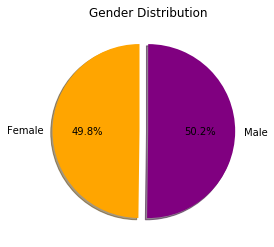

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create labels and titles for the pie chart in pyplot
labels = ["Female","Male"]
values = [124,125]
colors = ["orange", "purple"]
explode = (0.1, 0)
plt.title("Gender Distribution")
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

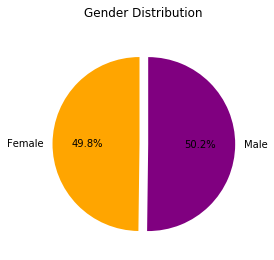

In [7]:
# plot the same plot from above using pandas
gender_df_gb_plot.plot(kind = "pie",title = "Gender Distribution",legend = False,subplots = True,startangle = 90, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# determine the top 4 most effective (by change in tumor volume)
tumor_values_gb = mouse_merge[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
# use the agg formula to group the drugs together to analyze which four are the most effective
tumor_values_sort = tumor_values_gb.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_values_sort
  
    

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# based on the original data, group by drug regimen and remove duplicate mouse IDs. This will give us only the last data point for each mouse
tumor_values = mouse_merge[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
tumor_values_sort = tumor_values.groupby(["Drug Regimen"])
tumor_values_sorted = tumor_values.sort_values(by=["Timepoint","Mouse ID"], ascending = False).drop_duplicates('Mouse ID')
tumor_values_indexed = tumor_values_sorted.set_index("Drug Regimen")
# create a list of values for each of the drugs to be analyzed
ramicane = tumor_values_indexed.filter(like="Ramicane",axis = 0)
ramicane = ramicane["Tumor Volume (mm3)"]
capomulin = tumor_values_indexed.filter(like="Capomulin",axis = 0)
capomulin = capomulin["Tumor Volume (mm3)"]
ceftamin = tumor_values_indexed.filter(like="Ceftamin",axis = 0)
ceftamin = ceftamin["Tumor Volume (mm3)"]
infubinol = tumor_values_indexed.filter(like="Infubinol",axis = 0)
infubinol = infubinol["Tumor Volume (mm3)"]

        

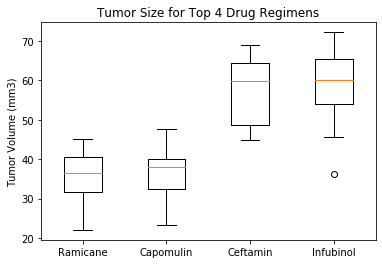

In [10]:
#create a box plot to incorporate all of the 4 drugs being analyze
data = [ramicane, capomulin, ceftamin, infubinol]
fig2, ax2 = plt.subplots()
ax2.set_title('Tumor Size for Top 4 Drug Regimens')
labels = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]
ax2.boxplot(data,labels=labels)
plt.ylabel('Tumor Volume (mm3)')
plt.show()


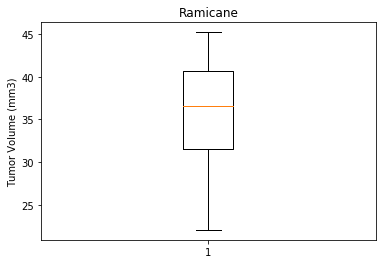

The lower quartile of Tumor Volume is: 31.56
The upper quartile of Tumor Volume is: 40.66
The interquartile range of Tumor Volume is: 9.1
The the median of Tumor Volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [11]:
#create individual box plots and calcualte important metrics associated with the success of each drug
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane)
plt.show()
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

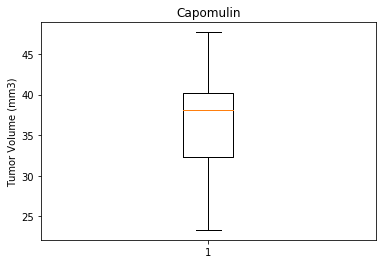

The lower quartile of Tumor Volume is: 32.38
The upper quartile of Tumor Volume is: 40.16
The interquartile range of Tumor Volume is: 7.78
The the median of Tumor Volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [12]:
#create individual box plots and calcualte important metrics associated with the success of each drug
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin)
plt.show()
#calculate the quartiles, bounds and IQR
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print all of this information
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


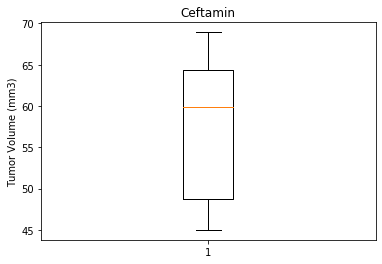

The lower quartile of Tumor Volume is: 48.72
The upper quartile of Tumor Volume is: 64.3
The interquartile range of Tumor Volume is: 15.58
The the median of Tumor Volume is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [13]:
#create individual box plots and calcualte important metrics associated with the success of each drug
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin)
plt.show()
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


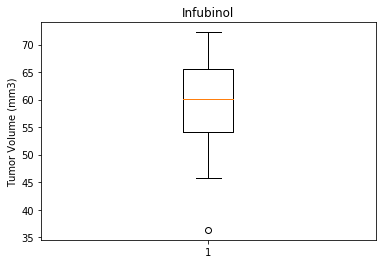

The lower quartile of Tumor Volume is: 54.05
The upper quartile of Tumor Volume is: 65.53
The interquartile range of Tumor Volume is: 11.48
The the median of Tumor Volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [14]:
#create individual box plots and calcualte important metrics associated with the success of each drug
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol)
plt.show()
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


## Line and scatter plots

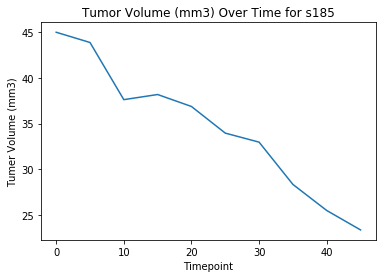

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#create a variable to hold the mouse ID for the analysis
m_id = "s185"
#set the index so that the filter can be used
capomulin_mouse = mouse_merge.set_index("Drug Regimen")
# use filter to isolate all mice with Capomulin drugs
capomulin_mouse = capomulin_mouse.filter(like="Capomulin",axis = 0)
#set new index to be able to filter on mouse id
capomulin_mouse = capomulin_mouse.set_index("Mouse ID")
#filter by mouse id
capomulin_mouse_single = capomulin_mouse.filter(like=m_id, axis = 0)
capomulin_mouse_single = capomulin_mouse_single[["Timepoint","Tumor Volume (mm3)"]]
#plot the line for the mouse
plt.plot(capomulin_mouse_single["Timepoint"],capomulin_mouse_single["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume (mm3) Over Time for {m_id}")
plt.xlabel('Timepoint')
plt.ylabel('Tumer Volume (mm3)')
plt.show()

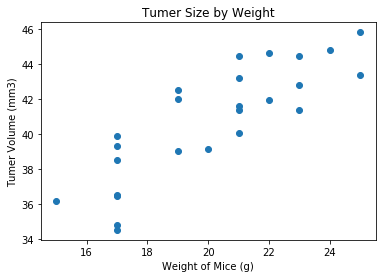

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group by the Capomulin mice to get the average tumor volume for each mouse
capomulin_mouse
capomulin_mouse_gb = capomulin_mouse[["Weight (g)","Tumor Volume (mm3)"]].groupby("Mouse ID").mean()
# assigne variables for weight and total volume
weight = capomulin_mouse_gb["Weight (g)"]
tv = capomulin_mouse_gb["Tumor Volume (mm3)"]

#plot the scatter plot
plt.scatter(weight,tv)
plt.title('Tumer Size by Weight')
plt.xlabel('Weight of Mice (g)')
plt.ylabel('Tumer Volume (mm3)')
plt.show()

# plt.scatter(capomulin_mouse["Weight (g)"],capomulin_mouse["Tumor Volume (mm3)"])

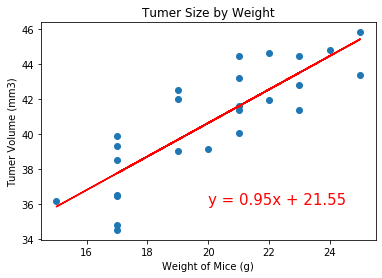

The correlation between both factors is 0.84


In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(weight,tv)
#calculate regression and correlation information
(slope, intercept, rvalue,pvalue,stderr) = linregress(weight,tv)
regress_values = weight*slope+intercept
#create the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot the original scatter plot and include the regression information
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Tumer Size by Weight')
plt.xlabel('Weight of Mice (g)')
plt.ylabel('Tumer Volume (mm3)')
plt.show()
#calculate and print the correlation efficient
correlation = st.pearsonr(weight,tv)
print(f"The correlation between both factors is {round(correlation[0],2)}")
